In [1]:
pip install pandas matplotlib seaborn plotly scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv("C:\\Users\\belea\\Downloads\\Unemployment in India.csv")

In [5]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [7]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.isnull().sum

<bound method DataFrame.sum of      Region   Date   Frequency   Estimated Unemployment Rate (%)  \
0     False  False       False                             False   
1     False  False       False                             False   
2     False  False       False                             False   
3     False  False       False                             False   
4     False  False       False                             False   
..      ...    ...         ...                               ...   
763    True   True        True                              True   
764    True   True        True                              True   
765    True   True        True                              True   
766    True   True        True                              True   
767    True   True        True                              True   

      Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0                  False                                     False  False  


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [13]:
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]


In [15]:
print(df.columns)

Index(['region', 'date', 'frequency', 'estimated_unemployment_rate_(%)',
       'estimated_employed', 'estimated_labour_participation_rate_(%)',
       'area'],
      dtype='object')


In [18]:
print(df['date'].head())

0   2019-05-31
1   2019-06-30
2   2019-07-31
3   2019-08-31
4   2019-09-30
Name: date, dtype: datetime64[ns]


In [19]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)


In [20]:
print(df.isnull().sum())

region                                     28
date                                       28
frequency                                  28
estimated_unemployment_rate_(%)            28
estimated_employed                         28
estimated_labour_participation_rate_(%)    28
area                                       28
dtype: int64


In [21]:
df.dropna(inplace=True)

In [23]:
df.rename(columns={
    'Estimated Unemployment Rate (%)': 'unemployment_rate',
    'Date': 'date'
}, inplace=True)

In [24]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

In [27]:
national_data = df.groupby("date")["estimated_unemployment_rate_(%)"].mean().reset_index()

In [28]:
print(national_data.head())

        date  estimated_unemployment_rate_(%)
0 2019-05-31                         8.874259
1 2019-06-30                         9.303333
2 2019-07-31                         9.033889
3 2019-08-31                         9.637925
4 2019-09-30                         9.051731


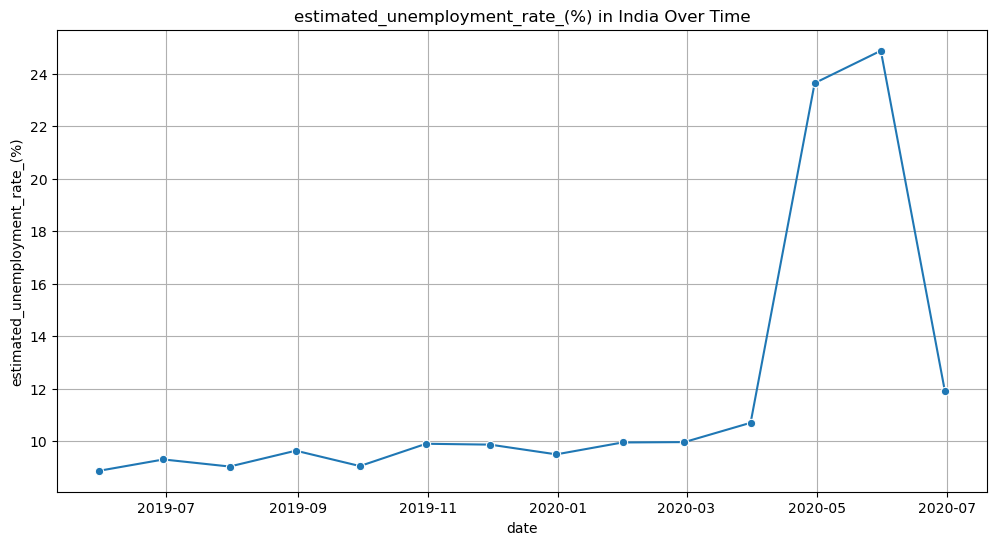

In [31]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=national_data, x='date', y='estimated_unemployment_rate_(%)', marker='o')
plt.title("estimated_unemployment_rate_(%) in India Over Time")
plt.ylabel("estimated_unemployment_rate_(%)")
plt.grid(True)
plt.show()

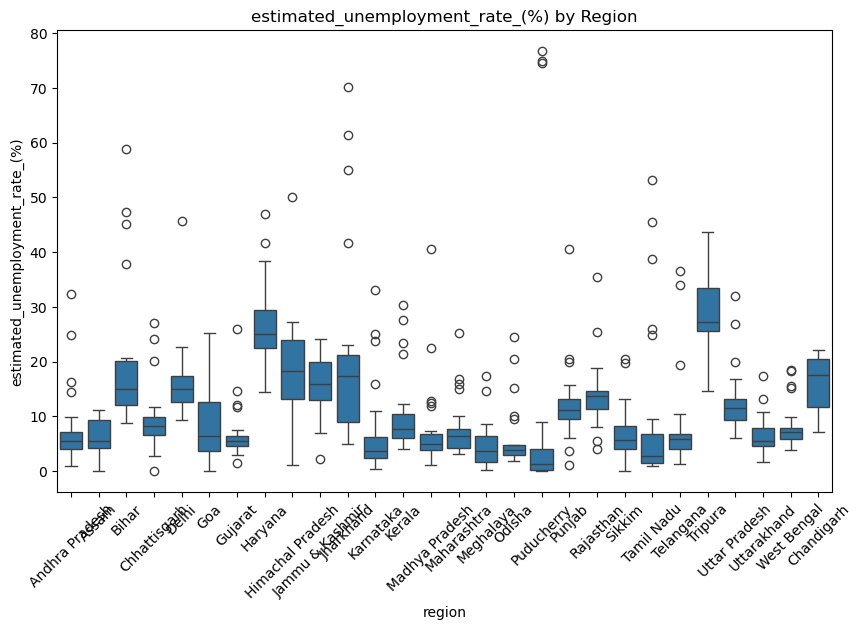

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='region', y='estimated_unemployment_rate_(%)')
plt.xticks(rotation=45)
plt.title("estimated_unemployment_rate_(%) by Region")
plt.show()

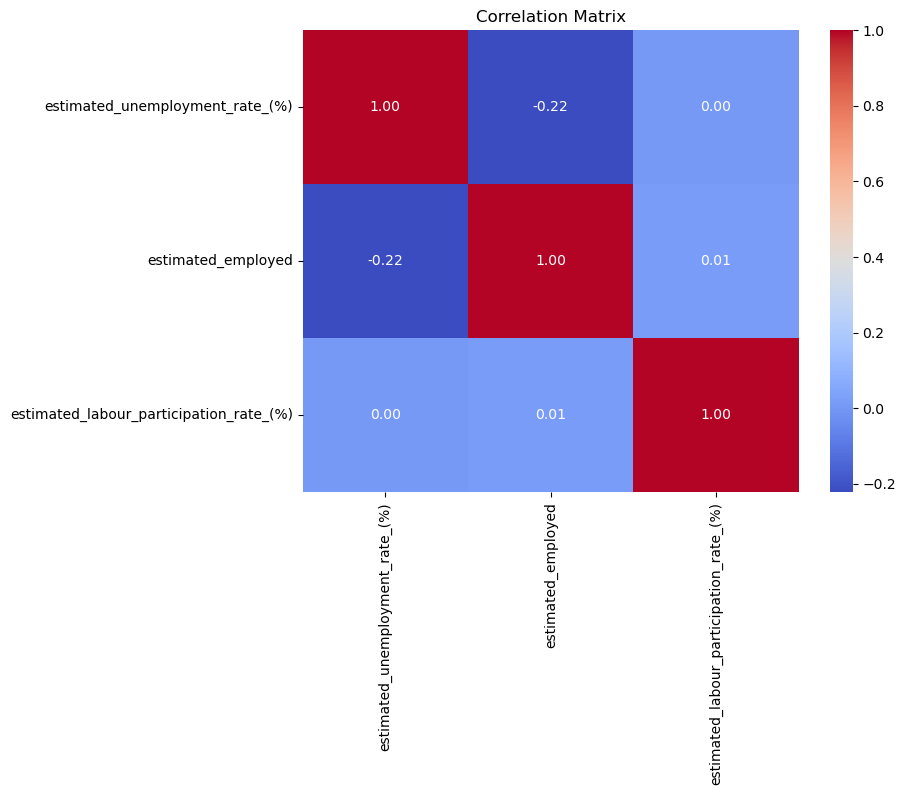

In [33]:
corr = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [34]:
national_data['date_ordinal'] = national_data['date'].map(pd.Timestamp.toordinal)

In [39]:
print(national_data.columns.tolist()) 

['date', 'estimated_unemployment_rate_(%)', 'date_ordinal']


In [40]:
X = national_data[['date_ordinal']]
y = national_data['estimated_unemployment_rate_(%)']


In [41]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [43]:
future_dates = pd.date_range(start=national_data['date'].max(), periods=12, freq='ME')


In [44]:
future_ordinals_df = pd.DataFrame(future_ordinals, columns=['date_ordinal'])
future_preds = model.predict(future_ordinals_df)


In [45]:
future_dates = pd.date_range(start=national_data['date'].max(), periods=12, freq='ME')
future_ordinals = future_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)
future_ordinals_df = pd.DataFrame(future_ordinals, columns=['date_ordinal'])  # Fix the warning
future_preds = model.predict(future_ordinals_df)

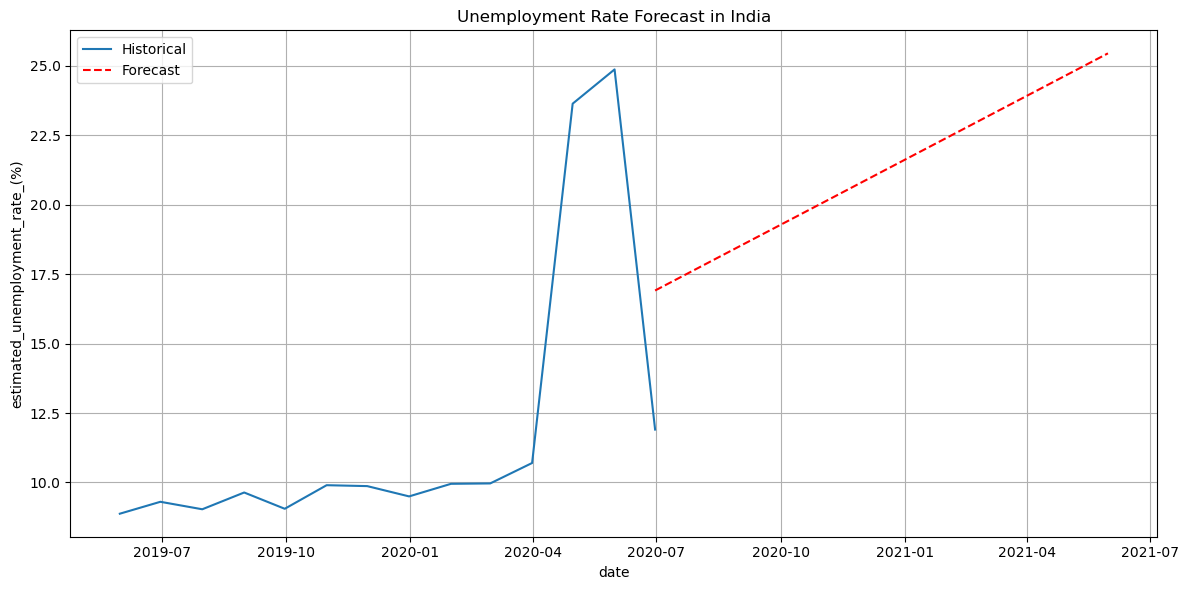

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(national_data['date'], national_data['estimated_unemployment_rate_(%)'], label='Historical')
plt.plot(future_dates, future_preds, label='Forecast', linestyle='--', color='red')
plt.xlabel('date')
plt.ylabel('estimated_unemployment_rate_(%)')
plt.title('Unemployment Rate Forecast in India')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
odel = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [54]:
y_pred = model.predict(X_test)

In [55]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [56]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 4.79
Root Mean Squared Error (RMSE): 5.76
R² Score: 0.26
